# Part 1: Data Loading and Initial Exploration 

The data for this project is stored in the `data` folder, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

First, we created the `conda` environment with the provided yaml file. 

### Read Data

We start by importing the necessary Python packages.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

We then load in the SOTU (State of the Union) dataset from the data folder as a pandas DataFrame and assign it to the "sou" variable. This dataset contains one row for each State of the Union speech and includes information on the President's name, the year, text of the speech, and word count. The first five rows are displayed below.

In [2]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
sou = pd.read_csv("data/SOTU.csv")
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


### Exploratory Data Analysis

Now, we will perform exploratory data analysis on our SOTU data. 

#### Number of Speeches per President

First, we start by computing the number of SOTU speeches that each president delivered. We can use the function value_counts() on the column "President" to count the number of speeches each president delivered, and then visualize these counts in a bar chart.

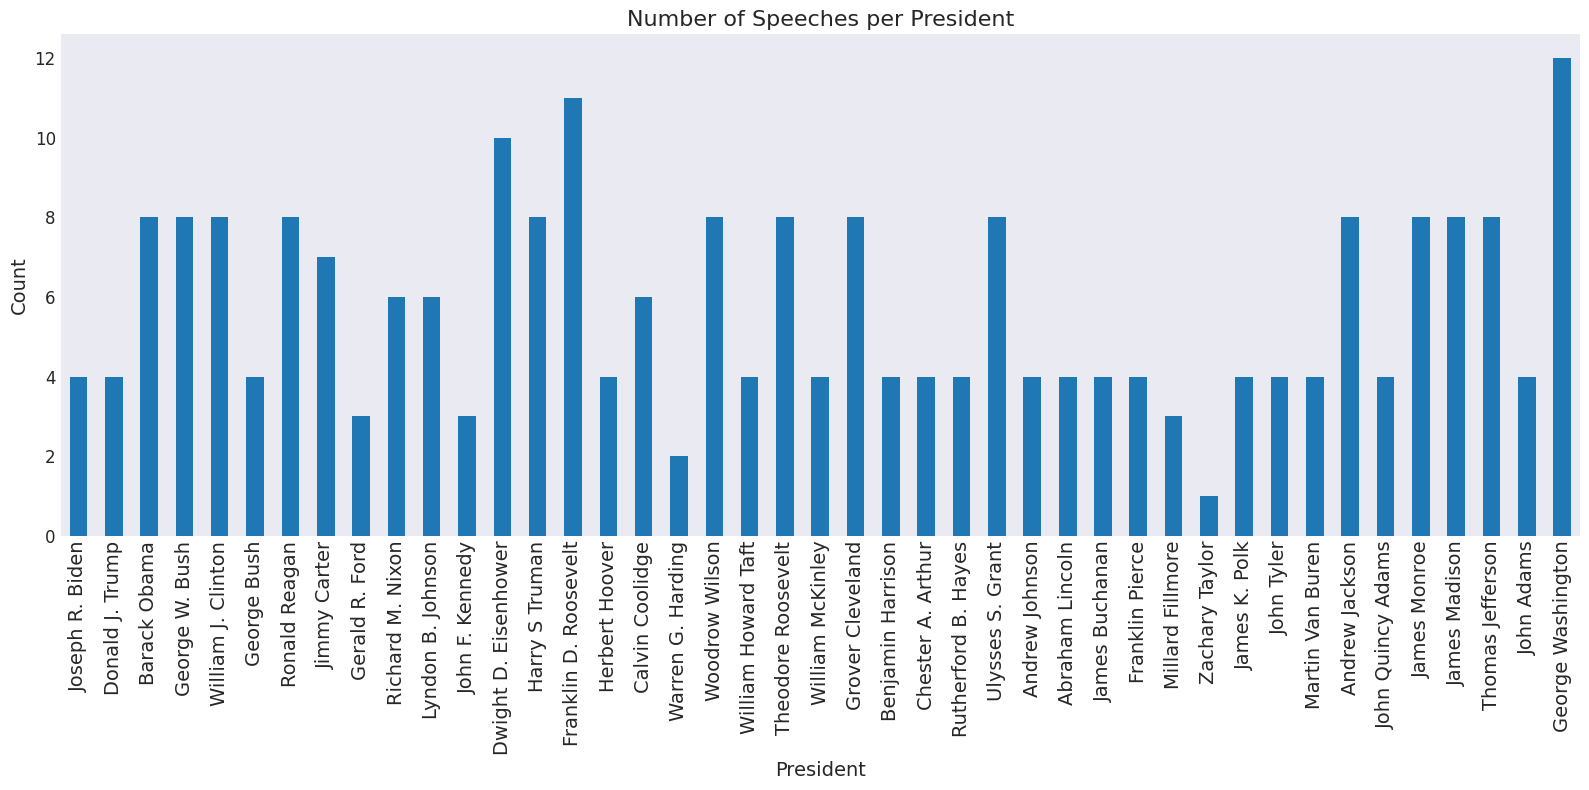

In [3]:
# Order presidents by their most recent SOTU year
# from newest to oldest (reverse chronological order):
presidents_ordered = (
    sou.groupby("President")["Year"]
       .max()                      # most recent year for each president
       .sort_values(ascending=False)
       .index                      # ordered list of president names
)

# Count the number of speeches delivered by each president: 
speech_counts = sou['President'].value_counts().sort_index()

# Reindex the series so that the presidents are in reverse chronological order:
speech_counts = speech_counts.reindex(presidents_ordered)

# Plot these counts in a bar chart:
plt.figure(figsize=(16, 8))
speech_counts.plot(kind='bar')
plt.title("Number of Speeches per President", fontsize=16)
plt.xlabel("President", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the figure to outputs folder
plt.savefig("outputs/speeches_per_president.png")

plt.show()

**Commentary on "Number of Speeches per President" visualization:**
This bar plot suggests that there is variation across different historical periods, with the most recent/modern presidents typically delivering around 4 to 8 speeches (this is reflective of the standard number of years in presidential office). Some recent presidents that fall into this range include Biden, Trump, Obama, George W. Bush, Clinton, George Bush, and Reagan. As we go further back in history, we see how some presidents occasionally have speech counts that are greater than 8. In particular, George Washington, the first president, delivered the greatest number of SOTU speeches. The plot also shows how some presidents during the 19th-century delivered relatively fewer SOTU speeches. This could be for a number of reasons, such as shorter durations in office, death, etc. Analyzing this bar plot reveals patterns potentially reflective of time in office and historical shifts in SOTU speech delivery/frequency.

#### Number of Speeches per Year

Next, we can  count the number of SOTU speeches in each year and then visualize how this count varies over time in a line plot. This visualization can help illustrate how the number of SOTU speeches per year varies over time.

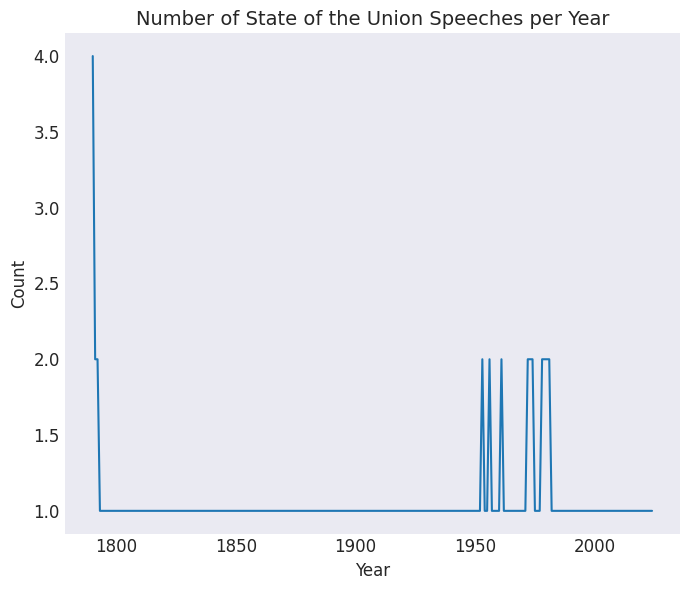

In [4]:
# Count the number of speeches per year, then sort by year
speeches_per_year = (
    sou["Year"]
    .value_counts()
    .sort_index()        # makes sure it's in chronological order
)

# Plot the counts over time
plt.figure(figsize=(7, 6))
speeches_per_year.plot(kind="line")

plt.title("Number of State of the Union Speeches per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# Save the figure to outputs folder
plt.savefig("outputs/speeches_per_year.png")

plt.show()

**Commentary on “Number of Speeches per Year” visualization:**

The above line plot depicts how the number of SOTU speeches per year were at a maximum when they first began, but sharply declined after the early years. This depicts how during the beginning few years of SOTU speeches, there were multiple State of the Union messages within the same year rather than a single annual speech, which is what we are familiar with today. The pattern in the line plot stabilizes after the early 1800s, and we see that most years have exactly one SOTU speech. However, note that there are some exceptions around the mid-1900s where we see some years with more than one speech. When thinking of reasons for these irregularities, we could consider transitions or special messages during this period that resulted in multiple SOTU speeches in a year. In recent years, the line plot once again remains flat at one speech each year, which is consistent with the modern standard of one single annual State of the Union address.


#### Word Count Distribution 

Next, we will explore the distribution of word counts to investigate how many words SOTU speeches tend to be. We will construct a histogram to visualize the distribution of SOTU word counts.

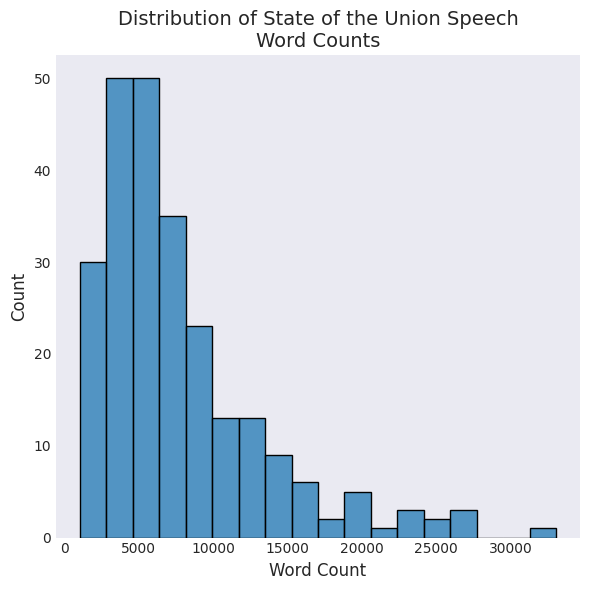

In [5]:
# Plot histogram of word counts
plt.figure(figsize=(6, 6))

sns.histplot(
    data=sou,
    x="Word Count",
    bins=18,
)

plt.title("Distribution of State of the Union Speech\nWord Counts", fontsize=14)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Save the figure to outputs folder
plt.savefig("outputs/wordcount_distribution.png")

plt.show()

**Commentary on “Word Count Distribution” visualization:**

The histogram above shows how the distribution of speech word counts is right-skewed. We can also see that most speeches are between roughly 3,000 and 10,000 words, which suggests that most SOTU speeches are concentrated within a relatively consistent length/word count range. However, the histogram also shows that there are several longer speeches that are longer than even 15,000 words. This is shown by the long tail on the right side of the distribution created by these outliers.

#### Word Count Distribution over Year

Next, we will investigate how the distribution of word count of SOTU speeches differs throughout the years. To do so, we will create a scatterplot showing speech year versus word count.

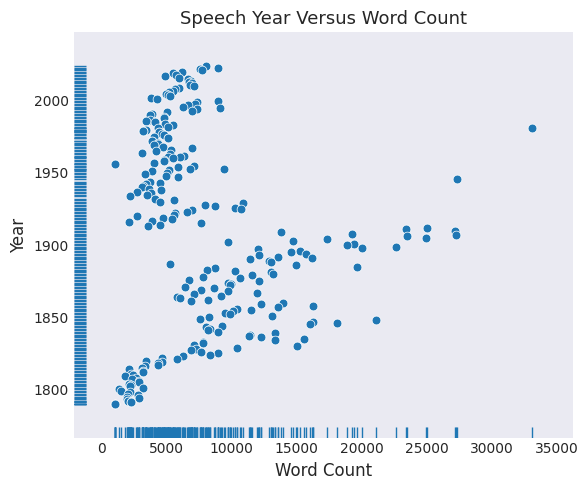

In [6]:
# Scatter plot showing speech year versus word count
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=sou,
    x="Word Count",
    y="Year",
    s=40
)

# Adding rug plots on the x-axis and y-axis 
sns.rugplot(
    data=sou,
    x="Word Count",
    y="Year",
    height=0.025,
)

plt.title("Speech Year Versus Word Count", fontsize=13)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Save the figure to outputs folder
plt.savefig("outputs/wordcount_over_year.png")

plt.show()

**Commentary on “Word Count Distribution over Year” visualization:**
The above scatter plot illustrates how early SOTU speeches, especially ones that were delivered between the late 1700s and early 1800s, were usually relatively short (generally under 4,000 words). As time progresses when we move into the mid-1800s and early 1900s, the range of word counts increases and is more variable. During the contemporary era, In the modern era, SOTU addresses tend to fall between about 5,000 and 10,000 words, which suggests a more consistent word count/length standard. We can see that are a few outliers (very long speeches over 20,000 words) during the mid-1900s to early-2000s. 


#### Word Count Distribution per President

Now, we can explore how word count/speech length varies across different presidents. To do so, we will calculate the average word count for each president's SOTU addresses, which we will then visualize using a bar chart.
 

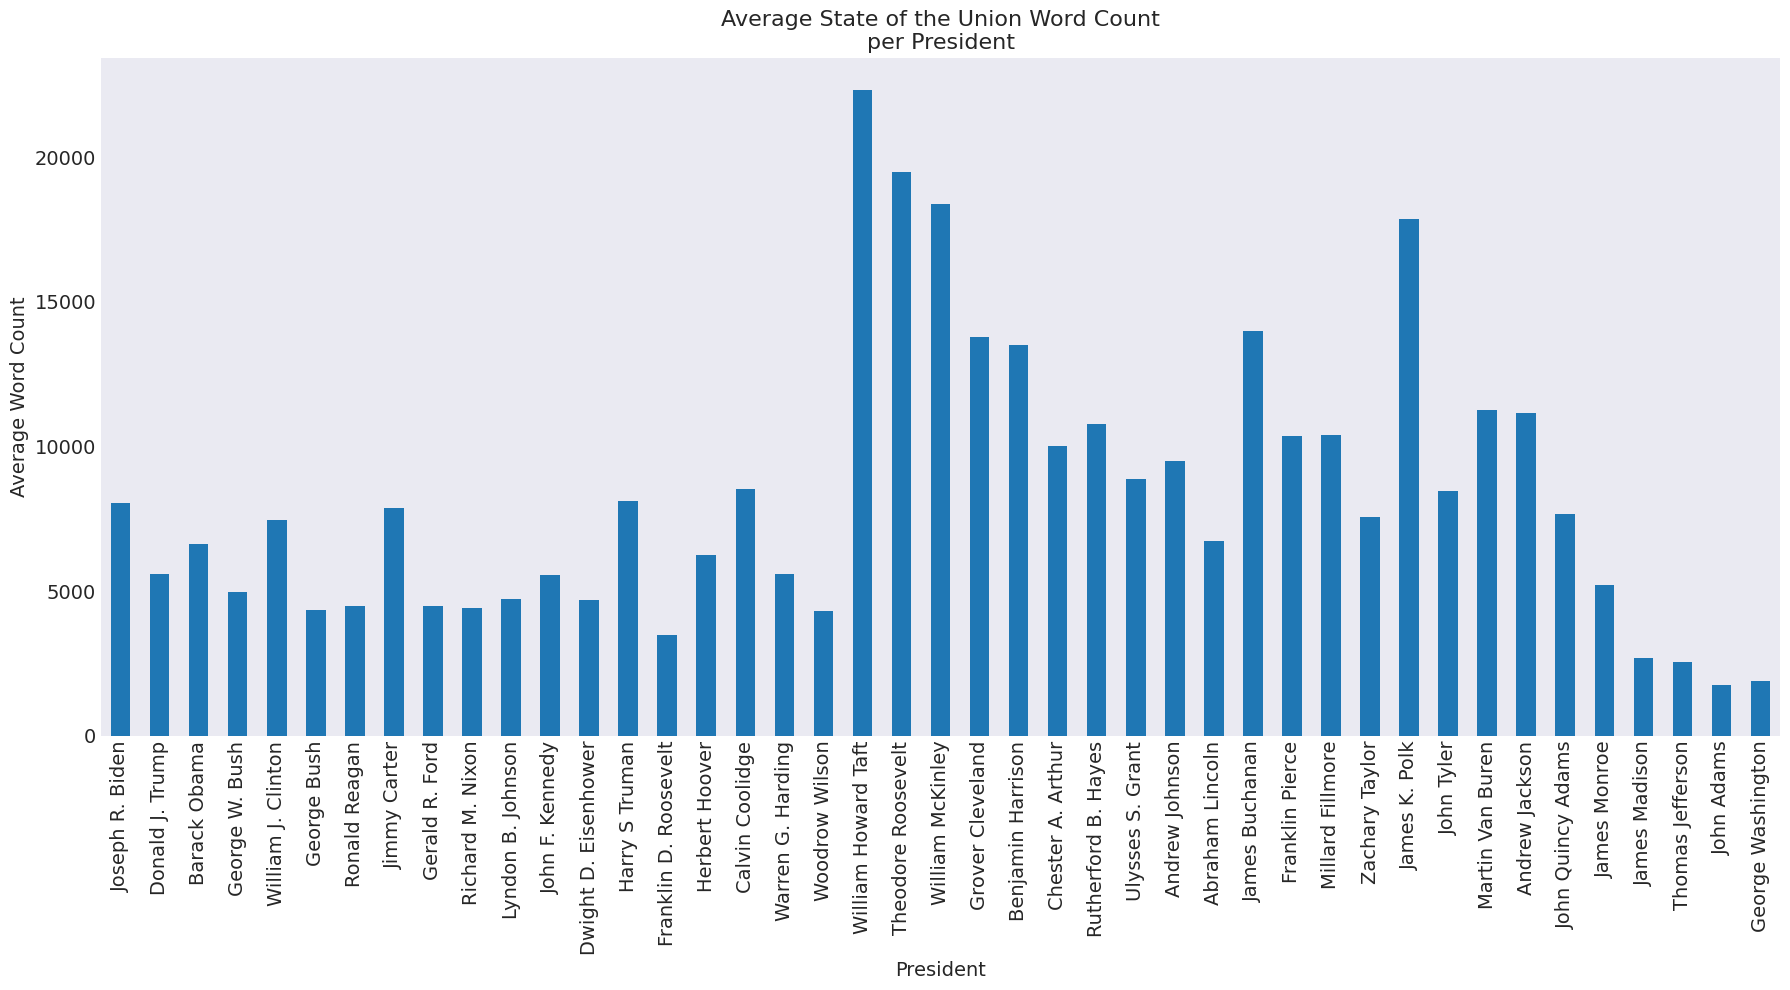

In [7]:
# Putting the presidents in reverse chronological order based on the most recent SOTU year
president_order = (
    sou.groupby("President")["Year"]
       .max()
       .sort_values(ascending=False)
       .index
)

# Calculate the average word count for each president
# then reindex into reverse chronological order
avg_wc = (
    sou.groupby("President")["Word Count"]
       .mean()
       .reindex(president_order)
)

# Plot the average word counts in a bar chart
plt.figure(figsize=(18, 10))
avg_wc.plot(kind="bar")

plt.title("Average State of the Union Word Count\nper President", fontsize=16)
plt.xlabel("President", fontsize=14)
plt.ylabel("Average Word Count", fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

# Save the figure to outputs folder
plt.savefig("outputs/avg_wordcount_per_president.png")

plt.show()

**Commentary on “Word Count Distribution per President” visualization:**
The above bar chart shows that there is considerable variation in the average word count of SOTU speeches across presidents. In general, we can see that early presidents' speeches were much shorter. Then, we see how in the late 1800s and early 1900s, the average word count of speeches increases and becomes more variable (we see some presidents with particularly long speeches/high average word counts, such as Polk). During the modern period, average word counts are consistently concentrated between about 5,000 and 10,000 words, which shows a more standardized word count norm.